# Financial Time Series Analysis: ARIMA & GARCH

Financial time series analysis is essential for understanding and predicting market behavior, particularly in terms of returns and volatility. Two widely used models for this purpose are ARIMA (AutoRegressive Integrated Moving Average) and GARCH (Generalized Autoregressive Conditional Heteroskedasticity). ARIMA is effective for modeling and forecasting returns, while GARCH is used to capture and predict volatility.

In this notebook, we will demonstrate how to use ARIMA and GARCH models for financial time series analysis. We will provide sample Python code, explanations of the models, diagnostic tests, and stated assumptions. This will help you understand how these models work and how to interpret their results.

In [4]:
#!pip install statsmodels arch


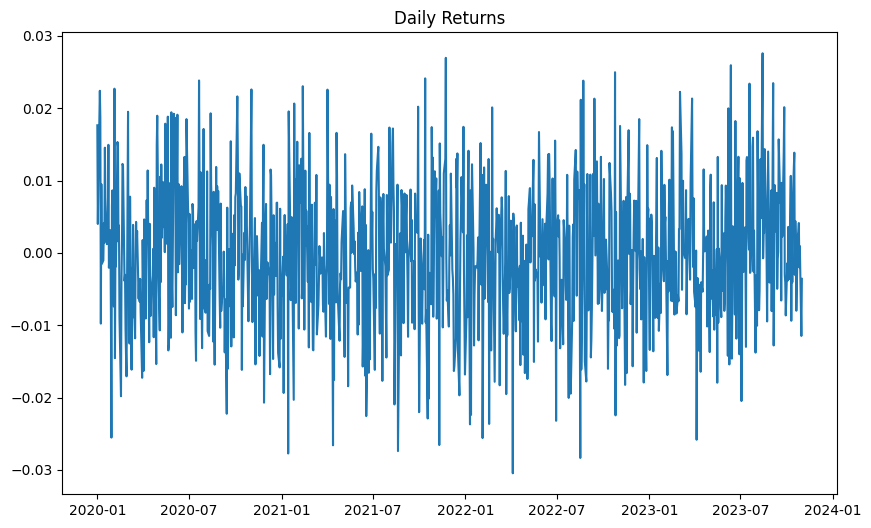

ADF Statistic: -32.46255933768997
p-value: 0.0


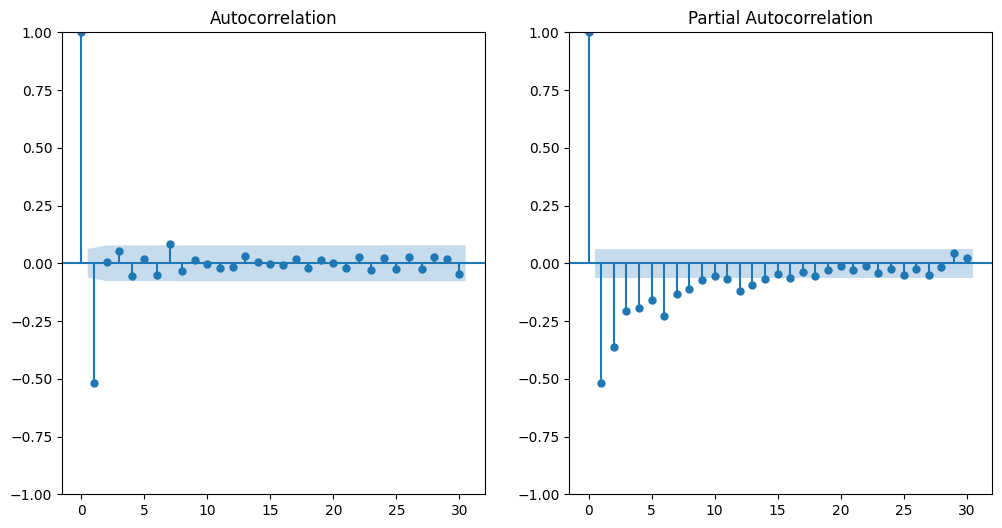

                               SARIMAX Results                                
Dep. Variable:                 Return   No. Observations:                 1000
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3193.323
Date:                Mon, 25 Aug 2025   AIC                          -6380.646
Time:                        16:41:42   BIC                          -6365.926
Sample:                    01-01-2020   HQIC                         -6375.051
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0324      0.032     -1.010      0.313      -0.095       0.030
ma.L1         -0.9914      0.006   -164.110      0.000      -1.003      -0.980
sigma2      9.743e-05   4.42e-06     22.027      0.0

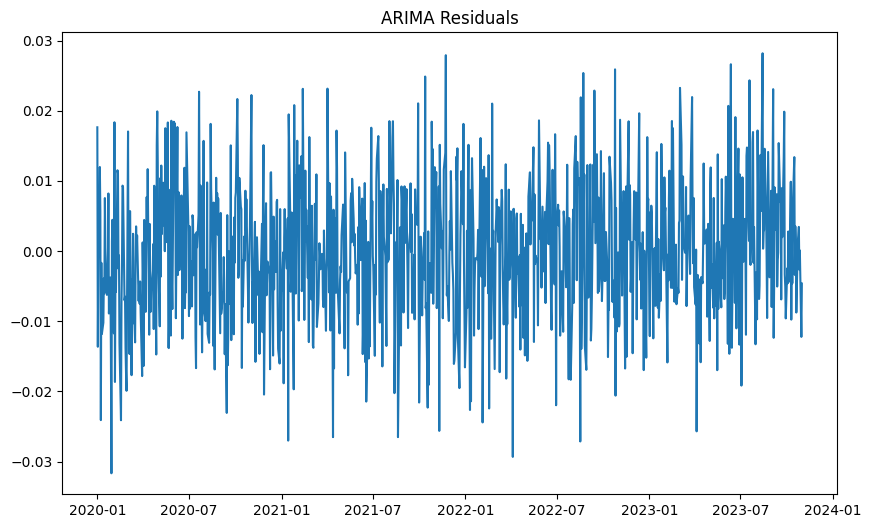

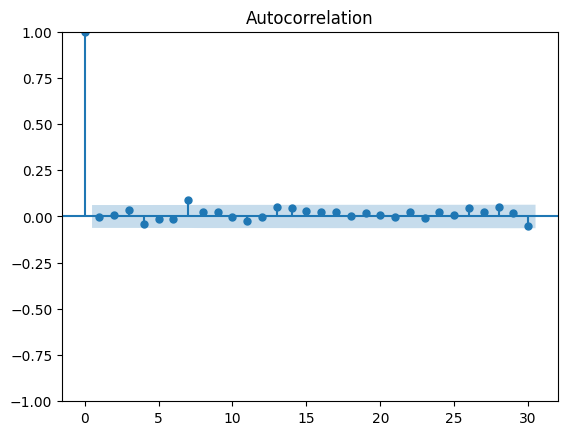

/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.742e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 79226211.07560173
Iteration:      2,   Func. Count:     17,   Neg. LLF: -3199.5088628338062
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3199.508863168544
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3199.51
Distribution:                  Normal   AIC:                          -6391.02
Method:            Maximum Likelihood   BIC:                          -6371.39
                                        No. Observations:                 1000
Date:                Mon, Aug 25 2025   Df Residuals:                      999
Time:         

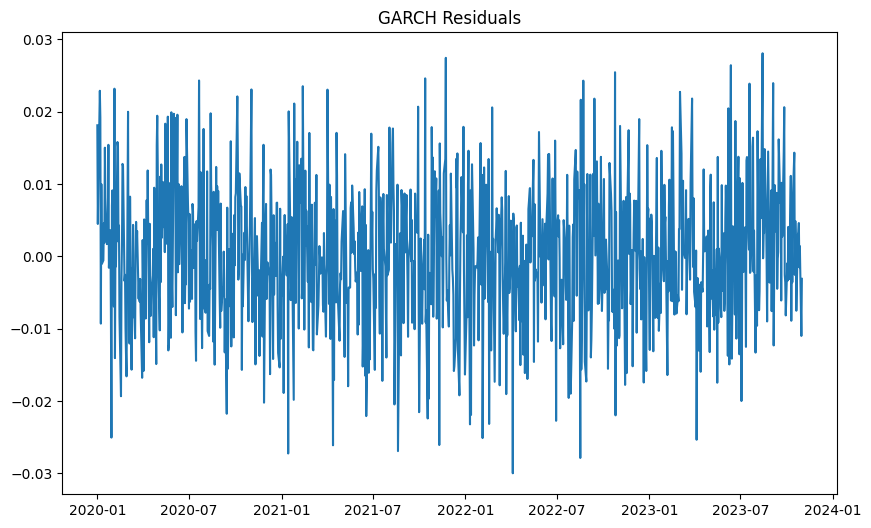

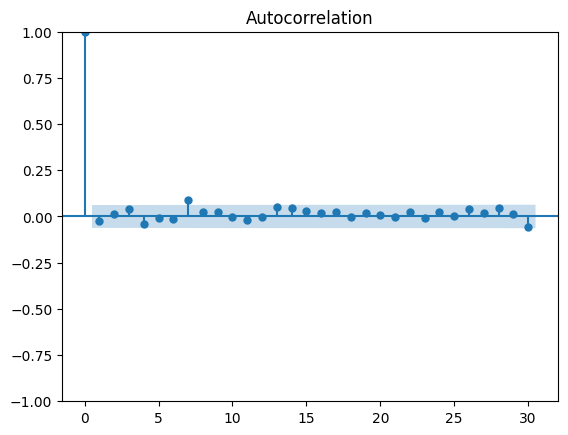

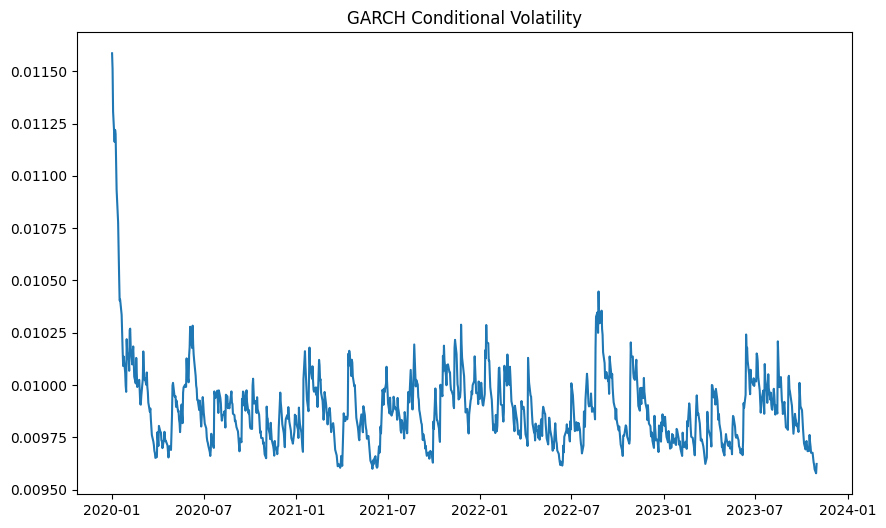

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load financial time series data (e.g., daily returns of a stock)
# For this example, we'll use a synthetic dataset
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=1000, freq='B')
returns = np.random.normal(0, 0.01, size=len(dates))
data = pd.DataFrame(returns, index=dates, columns=['Return'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Daily Returns')
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(data['Return'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Differencing to make the series stationary
data['Return_diff'] = data['Return'].diff().dropna()

# Plot ACF and PACF of the differenced series
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_acf(data['Return_diff'].dropna(), ax=ax[0])
plot_pacf(data['Return_diff'].dropna(), ax=ax[1])
plt.show()

# Fit ARIMA model
arima_model = ARIMA(data['Return'], order=(1, 1, 1))
arima_result = arima_model.fit()
print(arima_result.summary())

# Plot ARIMA residuals
plt.figure(figsize=(10, 6))
plt.plot(arima_result.resid)
plt.title('ARIMA Residuals')
plt.show()

# Check for autocorrelation in ARIMA residuals
plot_acf(arima_result.resid)
plt.show()

# Fit GARCH model
garch_model = arch_model(data['Return'], vol='Garch', p=1, q=1)
garch_result = garch_model.fit()
print(garch_result.summary())

# Plot GARCH residuals
plt.figure(figsize=(10, 6))
plt.plot(garch_result.resid)
plt.title('GARCH Residuals')
plt.show()

# Check for autocorrelation in GARCH residuals
plot_acf(garch_result.resid)
plt.show()

# Plot GARCH conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(garch_result.conditional_volatility)
plt.title('GARCH Conditional Volatility')
plt.show()


## **Interpretation of ARIMA Results with Explanation:**



#### **Summary of SARIMAX (Seasonal ARIMA with eXogenous regressors) results:**

- **Dep. Variable:** `Return`
- **Model:** ARIMA(1, 1, 1)
- **No. Observations:** 1000
- **Log Likelihood:** 3193.323
- **AIC (Akaike Information Criterion):** -6380.646
- **BIC (Bayesian Information Criterion):** -6365.926
- **HQIC (Hannan-Quinn Information Criterion):** -6375.051
- **Sample:** 01-01-2020 to 10-31-2023
- **Covariance Type:** opg (Outer Product of the Gradient)


**Diagnostic Tests:**

- **Augmented Dickey-Fuller (ADF) Test:**
  - The ADF test is used to check if the time series is stationary. A stationary time series has a constant mean, variance, and autocorrelation over time.
  - The null hypothesis of the ADF test is that the time series is non-stationary. If the p-value is less than the significance level (e.g., 0.05), we reject H0 and conclude that the time series is stationary.
  - In the context of the ARIMA model, if the ADF test indicates non-stationarity, differencing is applied to make the time series stationary. The results: ADF Statistic: -32.46255933768997 and p-value: 0.0 indicate that the time series is stationary.

- **Ljung-Box (L1) (Q):** 0.00 (Prob(Q): 0.99)
  - This test checks for autocorrelation in the residuals. A p-value of 0.99 suggests that there is no significant autocorrelation in the residuals.
- **Jarque-Bera (JB):** 0.26 (Prob(JB): 0.88)
  - This test checks for normality of the residuals. A p-value of 0.88 suggests that the residuals are normally distributed.
- **Heteroskedasticity (H):** 0.98 (Prob(H): 0.84)
  - This test checks for heteroskedasticity (non-constant variance) in the residuals. A p-value of 0.84 suggests that there is no significant heteroskedasticity.
- **Skew:** 0.03
  - This indicates the skewness of the residuals. A value close to 0 suggests that the residuals are symmetric.
- **Kurtosis:** 2.95
  - This indicates the kurtosis of the residuals. A value close to 3 suggests that the residuals have a normal distribution.

#### **Checking ARIMA Assumptions:**

- **Stationarity:** The ADF test results (ADF Statistic: -32.46255933768997, p-value: 0.0) indicate that the time series is stationary. This assumption is satisfied.

- **White Noise Residuals:** The Ljung-Box test (p-value: 0.99) suggests no significant autocorrelation in the residuals, indicating that the residuals are white noise. This assumption is satisfied.

- **Correct Model Specification:** The significant moving average term (ma.L1) and the variance of the error term (sigma2) suggest that the model is correctly specified. The non-significant autoregressive term (ar.L1) might indicate that the model could be simplified, but overall, the model specification seems reasonable.


**ARIMA (1,1,1) model:**

ARIMA (AutoRegressive Integrated Moving Average) is a statistical model used for understanding and predicting future points in a time series. It combines three types of components ARIMA(p,d,q):

-**AR(p):**  AR part of the model uses past values of the time series to predict the current value.
In this case, AR(1) means the model uses 1 lag of the time series. The formula: $ Y_t = c + \phi_1 Y_{t-1} + \epsilon_t $
  - $ Y_t $ is the current value.
  - $ c $ is a constant term.
  - $ \phi_1 $ is the coefficient for the first lag (ar.L1 in your case).
  - $ Y_{t-1} $ is the value from one time step ago.
  - $ \epsilon_t $ is the error term.

Since ar.L1: -0.0324 it means the current value $ Y_t $ is influenced by the previous value $ Y_{t-1} $ with a coefficient of -0.0324.


-**I(d)**: The Integrated (I) part involves differencing the raw observations to make the time series stationary. Stationarity means that the statistical properties of the series, such as mean and variance, are constant over time.Differencing helps to remove trends and seasonality, making the series more stable over time.

In this case, I(1) means the time series is differenced once. The formula: $ Y'_t = Y_t - Y_{t-1} $
  - $ Y'_t $ is the differenced series.
  - $ Y_t $ is the original series.
  - $ Y_{t-1} $ is the value from one time step ago.

-**MA(q):** Moving Average (MA) part of the model uses past errors (residuals) to predict the current value.

In this case, MA(1) means the model uses one lag of the error term. The formula: $ Y_t = c + \epsilon_t + \theta_1 \epsilon_{t-1} $
  - $ Y_t $ is the current value.
  - $ c $ is a constant term.
  - $ \epsilon_t $ is the current error term.
  - $ \theta_1 $ is the coefficient for the first lag of the error term (ma.L1 in your case).
  - $ \epsilon_{t-1} $ is the error term from one time step ago.

Since, ma.L1: -0.9914 means the current value $ Y_t $ is influenced by the previous error $ \epsilon_{t-1} $ with a coefficient of -0.9914.

**Summary:**

For an ARIMA(1,1,1) model, the combined formula is:

$Y'_t = c + \phi_1 Y'_{t-1} + \epsilon_t + \theta_1 \epsilon_{t-1} $

where:
- $ Y'_t $ is the differenced series.
- $ c $ is a constant term.
- $ \phi_1 $ is the AR coefficient (ar.L1).
- $ Y'_{t-1} $ is the differenced series from one time step ago.
- $ \epsilon_t $ is the current error term.
- $ \theta_1 $ is the MA coefficient (ma.L1).
- $ \epsilon_{t-1} $ is the error term from one time step ago.



## **Interpretation of GARCH Results with Explanation:**



**Summary of GARCH Results:**

- **Dep. Variable:** `Return`
- **Mean Model:** Constant Mean
- **Vol Model:** GARCH
- **Distribution:** Normal
- **Method:** Maximum Likelihood
- **Log-Likelihood:** 3199.51
- **AIC (Akaike Information Criterion):** -6391.02
- **BIC (Bayesian Information Criterion):** -6371.39
- **No. Observations:** 1000
- **Date:** Mon, Aug 25 2025
- **Time:** 16:32:46
- **Df Residuals:** 999
- **Df Model:** 1

**Mean Model:**
- **mu:** -4.9150e-04 (p-value: 0.115)
  - This is the constant mean of the returns. The p-value of 0.115 suggests that this term is not statistically significant at the 5% level.

**Volatility Model:**
- **omega:** 9.7424e-06 (p-value: 0.000)
  - This is the constant term in the volatility equation. The p-value of 0.000 suggests that this term is statistically significant.
- **alpha[1]:** 0.0100 (p-value: 0.000)
  - This is the coefficient for the ARCH term. The p-value of 0.000 suggests that this term is statistically significant.
- **beta[1]:** 0.8900 (p-value: 0.000)
  - This is the coefficient for the GARCH term. The p-value of 0.000 suggests that this term is statistically significant.

**GARCH Assumptions:**

- **Conditional mean of the returns is zero.** This implies that the expected return is constant over time. The p-value of 0.115 for the constant term `mu` suggests that this mean is not significantly different from zero, which is typical for financial returns.
- **Conditional variance is a function of past squared returns and past variances.** The GARCH(1,1) model captures the time-varying volatility of the returns. The significant coefficients for `omega`, `alpha[1]`, and `beta[1]` indicate that the model effectively captures the volatility clustering in the returns.
  - **omega:** Represents the long-term average volatility.
  - **alpha[1]:** Represents the impact of past squared returns on current volatility.
  - **beta[1]:** Represents the impact of past conditional variances on current volatility.
- **Residuals of the model are normally distribute.** The assumption of normally distributed residuals is crucial for the validity of the GARCH model. While the summary does not explicitly provide a normality test, the use of the normal distribution in the model suggests that this assumption is being made.

**Diagnostic Checks:**

- **Log-Likelihood:** 3199.51
  - This measures the goodness of fit of the model. Higher values indicate a better fit.
- **AIC and BIC:** These are information criteria used for model selection. Lower values indicate a better model.
- **R-squared and Adj. R-squared:** Both are zero, indicating that the mean model does not explain any of the variance in the returns. This is expected for financial returns, which often have a mean close to zero.



**GARCH(1,1) model**

GARCH (Generalized Autoregressive Conditional Heteroskedasticity) is a statistical model used to model and predict volatility in time series data, particularly in financial markets. It captures the phenomenon of volatility clustering, where periods of high volatility are followed by periods of high volatility, and periods of low volatility are followed by periods of low volatility.


A GARCH model typically has 2 main components:

- **Mean part** is the conditional mean of the time series. The mean equation is often simple and can be a constant mean or include exogenous variables. For example, a constant mean model: $ Y_t = \mu + \epsilon_t$

where:
- $ Y_t $ is the return at time $ t $.
- $ \mu $ is the constant mean.
- $ \epsilon_t $ is the error term (often assumed to be normally distributed with mean 0 and time-varying variance $ \sigma_t^2 $)


In this case, the GARCH(1,1) model has the coefficient mu (μ): -4.9150e-04 (p-value: 0.115). This means, the constant mean of the returns. The p-value of 0.115, which suggests that this term is not statistically significant at the 5% level. This indicates that the average return is close to zero and not significantly different from zero.

The constant mean model suggests that the average return is close to zero and not statistically significant. This is typical for financial returns, which often have a mean close to zero.



-**Volatility Equation:** This part models the conditional variance (volatility) of the time series. The volatility equation models the conditional variance $ \sigma_t^2 $ as a function of past squared errors and past variances. For a GARCH(1,1) model, the volatility equation is:
$ \sigma_t^2 = \omega + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2 $

where:
- $ \sigma_t^2 $ is the conditional variance at time $ t $.
- $ \omega $ is the constant term.
- $ \alpha $ is the coefficient for the ARCH term (past squared errors).
- $ \epsilon_{t-1}^2 $ is the squared error from the previous time step.
- $ \beta $ is the coefficient for the GARCH term (past conditional variances).
- $ \sigma_{t-1}^2 $ is the conditional variance from the previous time step.


In this case, GARCH(1,1) model, the coefficients are:

- omega: 9.7424e-06 (p-value: 0.000)
  - Explanation: This is the constant term in the volatility equation. It represents the long-term average volatility.
  - Significance: The p-value of 0.000 suggests that this term is statistically significant.

- alpha[1]: 0.0100 (p-value: 0.000)
  - Explanation: This is the coefficient for the ARCH term. It represents the impact of past squared errors on the current volatility.
  - Significance: The p-value of 0.000 suggests that this term is statistically significant.

- beta[1]: 0.8900 (p-value: 0.000)
  - Explanation: This is the coefficient for the GARCH term. It represents the impact of past conditional variances on the current volatility.
  - Significance: The p-value of 0.000 suggests that this term is statistically significant.


**Visualizing Conditional Volatility**

A conditional volatility plot is a graphical representation of the time-varying volatility of the time series at each time point, as estimated by a GARCH model. The graph shows how the volatility changes over time. Periods of high volatility are typically followed by periods of high volatility, and periods of low volatility are followed by periods of low volatility. Peaks in the plot indicate periods of high volatility, such as during economic announcements, earnings reports, or geopolitical events, when volatility tends to be high. Valleys in the plot indicate periods of low volatility, which are times when the returns are more stable, and the market is calmer.

This plot is crucial for risk management, as it helps in understanding the periods of high and low risk in the financial time series.

**Summary:**

The GARCH model effectively captures the conditional volatility of the returns, providing valuable insights into the dynamics of market volatility over time. This information is essential for risk management and strategic decision-making in financial markets.